<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 8 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Analysez les ventes d'une librairie avec R ou Python
</h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [4]:
# Importation des librairies principales
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency
from datetime import datetime, timedelta
from scipy.stats import ttest_ind
from scipy.stats import shapiro, spearmanr, f_oneway, kruskal

In [5]:
#redirection du répertoire de travail

os.chdir('C:/Users/jorda/Desktop/Documentation_formation/Formations/openclassroom/Livrable/Projet_n9/Data/Abderrahmane_jordan_Projet_9_Analysez_vente_librairie_062025') 

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [6]:
#Importation du fichier customers.xlsx
df_customers = pd.read_excel('customers.xlsx')

#Importation du fichier products.xlsx

df_products = pd.read_excel('products.xlsx')

#Importation du fichier Transactions.xlsx
df_transactions = pd.read_excel('Transactions.xlsx')


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier client</h3>
</div>

In [7]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_customers.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_customers.shape[1]))

Le tableau comporte 8621 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [8]:
#Consulter le nombre de colonnes
print("le fichier client comporte {} colonne(s)".format(len(df_customers.columns)))
#La nature des données dans chacune des colonnes
df_customers.dtypes

le fichier client comporte 3 colonne(s)


client_id    object
sex          object
birth         int64
dtype: object

In [9]:
#Le nombre de valeurs présentes dans chacune des colonnes
df_customers.count()

client_id    8621
sex          8621
birth        8621
dtype: int64

In [10]:
#Affichage les 5 premières lignes de la table
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [11]:
#Vérifier si il y a les lignes en doublons dans la colonne client_id
df_customers['client_id'].duplicated().any()


False

In [12]:
df_customers.isnull().any()

client_id    False
sex          False
birth        False
dtype: bool

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier produit</h3>
</div>

In [13]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_products.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_products.shape[1]))

Le tableau comporte 3286 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [14]:
#Consulter le nombre de colonnes
print("le fichier client comporte {} colonne(s)".format(len(df_products.columns)))
#La nature des données dans chacune des colonnes
df_products.dtypes

le fichier client comporte 3 colonne(s)


id_prod     object
price      float64
categ        int64
dtype: object

In [15]:
#Le nombre de valeurs présentes dans chacune des colonnes
df_products.count()


id_prod    3286
price      3286
categ      3286
dtype: int64

In [16]:
#Consulter le nombre de colonnes
print("le fichier client comporte {} colonne(s)".format(len(df_products.columns)))
#La nature des données dans chacune des colonnes
df_products.dtypes

le fichier client comporte 3 colonne(s)


id_prod     object
price      float64
categ        int64
dtype: object

In [17]:
#Affichage les 5 premières lignes de la table
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [18]:
#Vérifier si il y a les lignes en doublons dans la colonne client_id
df_products['id_prod'].duplicated().any()


False

In [19]:
df_products.isnull().any()

id_prod    False
price      False
categ      False
dtype: bool

In [20]:
df_products['price'].describe()

count    3286.000000
mean       21.863597
std        29.849786
min         0.620000
25%         6.990000
50%        13.075000
75%        22.990000
max       300.000000
Name: price, dtype: float64

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier transaction</h3>
</div>

In [21]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_transactions.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_transactions.shape[1]))

Le tableau comporte 687534 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [22]:
df_transactions.count()


id_prod       687534
date          687534
session_id    687534
client_id     687534
dtype: int64

In [23]:
#Consulter le nombre de colonnes
print("le fichier client comporte {} colonne(s)".format(len(df_transactions.columns)))
#La nature des données dans chacune des colonnes
df_transactions.dtypes

le fichier client comporte 4 colonne(s)


id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [24]:
#Affichage les 5 premières lignes de la table
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [25]:
df_transactions.isnull().any()

id_prod       False
date          False
session_id    False
client_id     False
dtype: bool

In [26]:
df_transactions.describe()

,id_prod,date,session_id,client_id
count,687534,687534,687534,687534
unique,3265,687419,345505,8600
top,1_369,2021-10-06 21:29:59.752585,s_118668,c_1609
freq,2340,2,14,25586


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Jointure des tables</h3>
</div>

In [27]:
# AVANT TOUT : Vérifier les clés de jointure disponibles
print("🔍 VÉRIFICATION DES CLÉS DE JOINTURE")
print("\nColonnes dans df_transactions :")
print(list(df_transactions.columns))

print("\nColonnes dans df_customers :")
print(list(df_customers.columns))

print("\nColonnes dans df_products :")
print(list(df_products.columns))

🔍 VÉRIFICATION DES CLÉS DE JOINTURE

Colonnes dans df_transactions :
['id_prod', 'date', 'session_id', 'client_id']

Colonnes dans df_customers :
['client_id', 'sex', 'birth']

Colonnes dans df_products :
['id_prod', 'price', 'categ']


In [28]:
# JOINTURE 1 : Transactions + Customers
print("🔗 ÉTAPE 1 : Jointure Transactions + Customers")
df_jointure_1 = df_transactions.merge(df_customers, on='client_id', how='left')
print(f"Avant jointure: {len(df_transactions)} transactions")
print(f"Après jointure customers : {len(df_jointure_1)} lignes, {df_jointure_1.shape[1]} colonnes")

🔗 ÉTAPE 1 : Jointure Transactions + Customers
Avant jointure: 687534 transactions
Après jointure customers : 687534 lignes, 6 colonnes


In [29]:
# Vérification
missing_customers = df_jointure_1.isnull().sum().sum()
if missing_customers > 0:
    print(f" ATTENTION : {missing_customers} valeurs manquantes après jointure !")
else:
    print("✅ Jointure customers réussie")

#missing_customers = df_jointure_1.isnull().values.sum()

#Ou

#total_missing = df_jointure_1.isna().sum().sum()
#Le premier .sum() additionne par colonne, le second additionne le résultat pour avoir le total général

✅ Jointure customers réussie


In [30]:
# JOINTURE 2 : Résultat précédent + Products
print("🔗 ÉTAPE 2 : Jointure + Products")
df_main = df_jointure_1.merge(df_products, on='id_prod', how='left')
print(f"Avant jointure : {len(df_jointure_1)}")
print(f"Après jointure products : {len(df_main)} lignes, {df_main.shape[1]} colonnes")


🔗 ÉTAPE 2 : Jointure + Products
Avant jointure : 687534
Après jointure products : 687534 lignes, 8 colonnes


In [31]:
# Vérification 
missing_products = df_main.isnull().sum().sum()
if missing_products > 0:
    print(f" ATTENTION : {missing_products} valeurs manquantes après jointure !")
else:
    print("✅ Jointure products réussie")

✅ Jointure products réussie


In [32]:
#Dimesion dataset final
print(f"\n DATASET FINAL : {df_main.shape[0]} lignes, {df_main.shape[1]} colonnes")


 DATASET FINAL : 687534 lignes, 8 colonnes


In [33]:
# Vérification des dimensions
print(f"\nDimensions après jointure :")
print(f"Transactions : {len(df_main):,}")
print(f"Clients uniques : {df_main['client_id'].nunique():,}")
print(f"Produits uniques : {df_main['id_prod'].nunique():,}")


Dimensions après jointure :
Transactions : 687,534
Clients uniques : 8,600
Produits uniques : 3,265


In [34]:
# CLIENTS SANS ACHAT (dans df_customers mais jamais commandé)
clients_actifs = df_transactions['client_id'].unique()
client_sans_achat = df_customers[~df_customers['client_id'].isin(clients_actifs)]

print(f"Clients sans achat : {len(client_sans_achat)} sur {len(df_customers)}")
print(f"Pourcentage : {len(client_sans_achat)/len(df_customers)*100:.1f}%")

# PRODUITS NON VENDUS (dans df_products mais jamais vendus)
produits_vendus = df_transactions['id_prod'].unique()
produits_non_vendus = df_products[~df_products['id_prod'].isin(produits_vendus)]

print(f"Produits non vendus : {len(produits_non_vendus)} sur {len(df_products)}")
print(f"Pourcentage : {len(produits_non_vendus)/len(df_products)*100:.1f}%")

# Pour voir les détails
print("\nAperçu clients sans achat :")
print(client_sans_achat.head())

print("\nAperçu produits non vendus :")
print(produits_non_vendus.head())

Clients sans achat : 21 sur 8621
Pourcentage : 0.2%
Produits non vendus : 21 sur 3286
Pourcentage : 0.6%

Aperçu clients sans achat :
     client_id sex  birth
801     c_8253   f   2001
2483    c_3789   f   1997
2734    c_4406   f   1998
2768    c_2706   f   1967
2850    c_3443   m   1959

Aperçu produits non vendus :
    id_prod  price  categ
184  0_1016  35.06      0
279  0_1780   1.67      0
736  0_1062  20.08      0
793  0_1119   2.99      0
810  0_1014   1.15      0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Préparation des données</h3>
</div>

In [35]:
client_ca_global = df_main.groupby('client_id')['price'].sum().sort_values(ascending=False)
client_ca_global.head(10)

client_id
c_1609    326039.89
c_4958    290227.03
c_6714    153918.60
c_3454    114110.57
c_1570      5285.82
c_3263      5276.87
c_2140      5260.18
c_2899      5214.05
c_7319      5155.77
c_7959      5135.75
Name: price, dtype: float64

In [36]:
# CRÉATION DE DF MAIN SANS OUTLIERS : éviter plus tard des biais d'analyse par rapports au CA

# 1. On a déterminé que les 4 plus gros CA semblait hors catégorie et probablement lié à des cliens professionels et non particulier contrairement aux autres.
#On les place donc à l'écart de notre analysé
client_ca_total = df_main.groupby('client_id')['price'].sum()
top_4_clients = client_ca_total.nlargest(4).index

# 2. Créer le df_main sans ces outliers
df_main_sans_outliers = df_main[~df_main['client_id'].isin(top_4_clients)].copy()

# 3. Vérification
print(f"DataFrame original : {len(df_main)} transactions")
print(f"DataFrame sans outliers : {len(df_main_sans_outliers)} transactions")
print(f"Clients supprimés : {list(top_4_clients)}")

ca_original = df_main['price'].sum()
ca_sans_outliers = df_main_sans_outliers['price'].sum()
print(f"CA supprimé : {((ca_original - ca_sans_outliers) / ca_original * 100):.1f}%")

DataFrame original : 687534 transactions
DataFrame sans outliers : 640734 transactions
Clients supprimés : ['c_1609', 'c_4958', 'c_6714', 'c_3454']
CA supprimé : 7.4%


In [37]:
# Calcul de l'âge à partir de l'année de naissance
annee_actuelle = datetime.now().year
df_main['age'] = annee_actuelle - df_main['birth']
df_main_sans_outliers['age'] = annee_actuelle - df_main['birth']

# Création des tranches d'âge

bins = [0, 26, 36, 51, 66, 100]
labels = ['18-25', '26-35', '36-50', '51-65', '65+']
df_main['tranche_age'] = pd.cut(df_main['age'], bins=bins, labels=labels, right=False)
df_main_sans_outliers['tranche_age'] = pd.cut(df_main['age'], bins=bins, labels=labels, right=False)

# Vérification
print('Avec OUTLIERS')
print(df_main['tranche_age'].value_counts())
print(df_main[['age', 'tranche_age']].head(10))

print('\n Sans OUTLIERS')
print(df_main_sans_outliers['tranche_age'].value_counts())
print(df_main_sans_outliers[['age', 'tranche_age']].head(10))

Avec OUTLIERS
tranche_age
36-50    335081
51-65    160046
26-35     83199
65+       75602
18-25     33606
Name: count, dtype: int64
   age tranche_age
0   58       51-65
1   65       51-65
2   37       36-50
3   36       36-50
4   69         65+
5   44       36-50
6   45       36-50
7   44       36-50
8   57       51-65
9   42       36-50

 Sans OUTLIERS
tranche_age
36-50    309495
51-65    144054
26-35     77977
65+       75602
18-25     33606
Name: count, dtype: int64
    age tranche_age
0    58       51-65
1    65       51-65
2    37       36-50
3    36       36-50
4    69         65+
5    44       36-50
7    44       36-50
8    57       51-65
9    42       36-50
10   55       51-65


In [38]:
# Conversion de la date
df_main['date'] = pd.to_datetime(df_main['date'])
df_main_sans_outliers['date'] = pd.to_datetime(df_main_sans_outliers['date'])

In [39]:
print(f"Le fichier sans outliers comporte {df_main_sans_outliers['client_id'].nunique()} clients distincts")
df_main_sans_outliers

Le fichier sans outliers comporte 8596 clients distincts


,id_prod,date,session_id,client_id,sex,birth,price,categ,age,tranche_age
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,11.99,0,58,51-65
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,19.37,0,65,51-65
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,4.50,0,37,36-50
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,6.55,0,36,36-50
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,16.49,0,69,65+
...,...,...,...,...,...,...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,21.92,1,29,26-35
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994,48.99,2,31,26-35
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985,26.99,1,40,36-50
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,8.99,0,72,65+


In [40]:
# PAS de "chiffre_affaires" ! Chaque ligne = 1 produit acheté au prix indiqué
# Le price EST déjà le montant de cette ligne d'achat
print("📋 Structure des données comprise :")
print("   - Chaque ligne = 1 produit acheté")
print("   - price = montant de cet achat")
print("   - session_id = regroupement des achats d'une même commande")


📋 Structure des données comprise :
   - Chaque ligne = 1 produit acheté
   - price = montant de cet achat
   - session_id = regroupement des achats d'une même commande


In [41]:
# Affichage des informations générales


print("INFORMATIONS GÉNÉRALES :")
print(f"Période d'analyse : {df_main['date'].min()} à {df_main['date'].max()}")
print(f"Nombre de clients uniques : {df_main['client_id'].nunique()}")
print(f"Nombre de produits uniques : {df_main['id_prod'].nunique()}")
print(f"Nombre de sessions d'achat : {df_main['session_id'].nunique()}")
print(f"CA total (somme des prix) : {df_main['price'].sum():,.2f} €")
print(f"Prix moyen par article : {df_main['price'].mean():.2f} €")
print(f"Panier moyen par session : {df_main.groupby('session_id')['price'].sum().mean():.2f} €")

INFORMATIONS GÉNÉRALES :
Période d'analyse : 2021-03-01 00:01:07.843138 à 2023-02-28 23:58:30.792755
Nombre de clients uniques : 8600
Nombre de produits uniques : 3265
Nombre de sessions d'achat : 345505
CA total (somme des prix) : 12,027,663.10 €
Prix moyen par article : 17.49 €
Panier moyen par session : 34.81 €


In [42]:
# Création de variables dérivées pour l'analyse temporelle
df_main['mois'] = df_main['date'].dt.to_period('M')
df_main['semaine'] = df_main['date'].dt.to_period('W')
df_main['jour_semaine'] = df_main['date'].dt.day_name()
df_main['mois_num'] = df_main['date'].dt.month


df_main_sans_outliers['mois'] = df_main_sans_outliers['date'].dt.to_period('M')
df_main_sans_outliers['semaine'] = df_main_sans_outliers['date'].dt.to_period('W')
df_main_sans_outliers['jour_semaine'] = df_main_sans_outliers['date'].dt.day_name()
df_main_sans_outliers['mois_num'] = df_main_sans_outliers['date'].dt.month

In [43]:
print("APERÇU DU DATASET FUSIONNÉ :")
df_main.head()

APERÇU DU DATASET FUSIONNÉ :


,id_prod,date,session_id,client_id,sex,birth,price,categ,age,tranche_age,mois,semaine,jour_semaine,mois_num
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,11.99,0,58,51-65,2021-03,2021-03-01/2021-03-07,Monday,3
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,19.37,0,65,51-65,2021-03,2021-03-01/2021-03-07,Monday,3
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,4.50,0,37,36-50,2021-03,2021-03-01/2021-03-07,Monday,3
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,6.55,0,36,36-50,2021-03,2021-03-01/2021-03-07,Monday,3
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,16.49,0,69,65+,2021-03,2021-03-01/2021-03-07,Monday,3


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Analyse des indicateurs de vente</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Évolution du chiffre d'affaires avec moyenne mobile</h3>
</div>

In [44]:

# Calcul du CA journalier
ca_daily = df_main_sans_outliers.groupby(df_main_sans_outliers['date'].dt.date)['price'].sum()

# Conversion de l'index en DatetimeIndex et resample
ca_daily.index = pd.to_datetime(ca_daily.index)
ca_daily = ca_daily.resample('D').sum().fillna(0)
ca_daily = ca_daily.to_frame('ca_journalier')

#resample : Crée une grille temporelle complète (tous les jours), Groupe par période (jour, semaine, mois...), Applique l'agrégation (sum, mean, count...) Comble les trous avec NaN (qu'on remplit ensuite)

In [45]:
print(f"📊 Période d'analyse : {ca_daily.index.min()} à {ca_daily.index.max()}")
print(f"📊 Nombre de jours avec ventes : {(ca_daily['ca_journalier'] > 0).sum()}")
print(f"💰 CA total sur la période : {ca_daily['ca_journalier'].sum():,.2f} €")


📊 Période d'analyse : 2021-03-01 00:00:00 à 2023-02-28 00:00:00
📊 Nombre de jours avec ventes : 730
💰 CA total sur la période : 11,143,367.01 €


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Calcul des moyennes mobiles</h3>
</div>

In [46]:
ca_daily['Moyenne_mobile_7'] = ca_daily['ca_journalier'].rolling(window=7, min_periods=1).mean()
ca_daily['Moyenne_mobile_30'] = ca_daily['ca_journalier'].rolling(window=30, min_periods=1).mean()

In [47]:
print(" Échantillon des données avec moyennes mobiles :")
print(ca_daily.head(10))


 Échantillon des données avec moyennes mobiles :
            ca_journalier  Moyenne_mobile_7  Moyenne_mobile_30
date                                                          
2021-03-01       15468.65      15468.650000       15468.650000
2021-03-02       14558.47      15013.560000       15013.560000
2021-03-03       13899.99      14642.370000       14642.370000
2021-03-04       13567.62      14373.682500       14373.682500
2021-03-05       16216.09      14742.164000       14742.164000
2021-03-06       14500.26      14701.846667       14701.846667
2021-03-07       14032.93      14606.287143       14606.287143
2021-03-08       14486.72      14466.011429       14591.341250
2021-03-09       14391.34      14442.135714       14569.118889
2021-03-10       14581.38      14539.477143       14570.345000


In [48]:
#  Calcul du CA journalier par catégorie
ca_daily_par_categ = df_main.groupby([df_main['date'].dt.date, 'categ'])['price'].sum().unstack(fill_value=0)

#Series classique → to_frame()
#Series MultiIndex → unstack() (plus puissant)

In [49]:
ca_daily_par_categ

categ,0,1,2
date,,,
2021-03-01,6262.65,6811.53,3491.04
2021-03-02,6718.27,5627.15,3141.03
2021-03-03,6121.03,5691.41,3386.25
2021-03-04,5891.48,6098.98,3205.61
2021-03-05,5975.97,7071.21,4424.19
...,...,...,...
2023-02-24,6197.92,5471.07,3538.90
2023-02-25,4942.69,8050.61,2767.95
2023-02-26,5522.90,7009.09,3772.73


In [50]:
# Conversion de l'index en DatetimeIndex et resample
ca_daily_par_categ.index = pd.to_datetime(ca_daily_par_categ.index)
ca_daily_par_categ = ca_daily_par_categ.resample('D').sum().fillna(0)

In [51]:
# Calcul des moyennes mobiles pour chaque catégorie
# Moyennes mobiles 7 jours
ca_daily_par_categ_mm7 = ca_daily_par_categ.rolling(window=7, min_periods=1).mean()
ca_daily_par_categ_mm7.columns = [f'{col}_MM7' for col in ca_daily_par_categ_mm7.columns]

# Moyennes mobiles 30 jours
ca_daily_par_categ_mm30 = ca_daily_par_categ.rolling(window=30, min_periods=1).mean()
ca_daily_par_categ_mm30.columns = [f'{col}_MM30' for col in ca_daily_par_categ_mm30.columns]

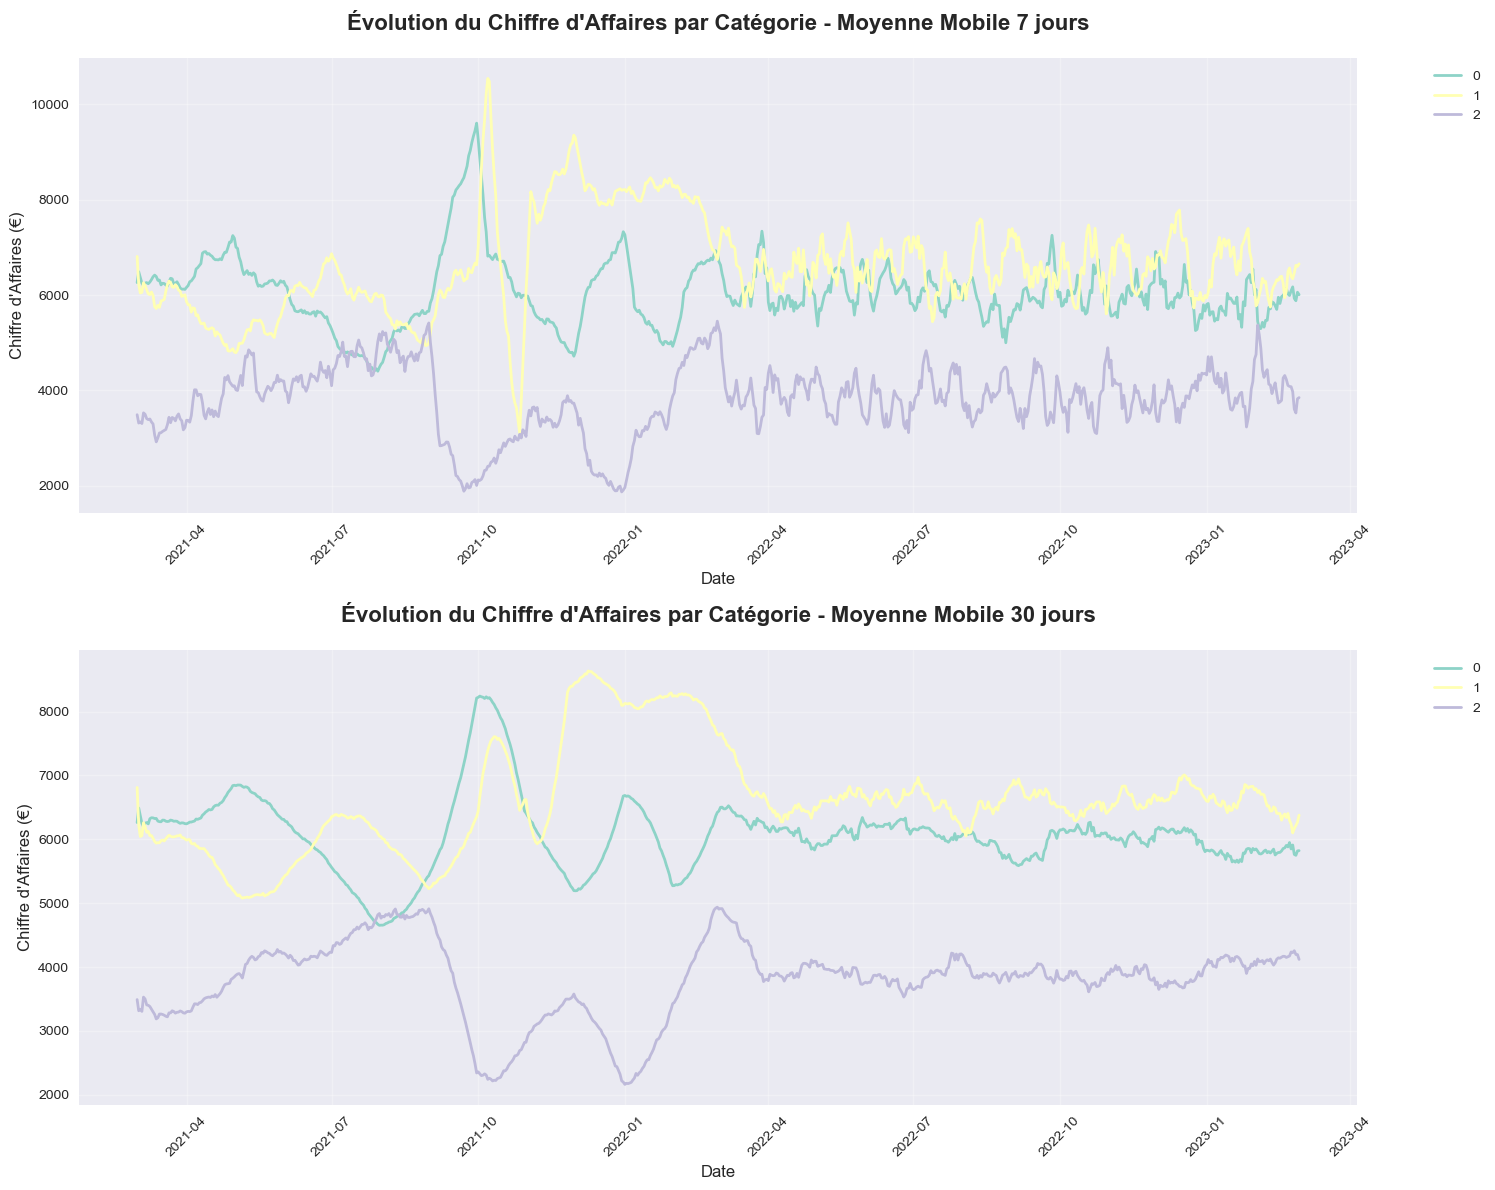

In [52]:
# Création graphique d'évolution
# Configuration du style
plt.style.use('seaborn-v0_8')
colors = plt.cm.Set3(range(len(ca_daily_par_categ.columns)))

# Graphique 1 : Moyennes mobiles 7 jours par catégorie
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Graphique des moyennes mobiles 7 jours
for i, categ in enumerate(ca_daily_par_categ.columns):
    ax1.plot(ca_daily_par_categ_mm7.index, 
             ca_daily_par_categ_mm7[f'{categ}_MM7'], 
             label=f'{categ}', 
             color=colors[i], 
             linewidth=2)

ax1.set_title('Évolution du Chiffre d\'Affaires par Catégorie - Moyenne Mobile 7 jours', 
              fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Chiffre d\'Affaires (€)', fontsize=12)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Graphique des moyennes mobiles 30 jours
for i, categ in enumerate(ca_daily_par_categ.columns):
    ax2.plot(ca_daily_par_categ_mm30.index, 
             ca_daily_par_categ_mm30[f'{categ}_MM30'], 
             label=f'{categ}', 
             color=colors[i], 
             linewidth=2)

ax2.set_title('Évolution du Chiffre d\'Affaires par Catégorie - Moyenne Mobile 30 jours', 
              fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Chiffre d\'Affaires (€)', fontsize=12)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Graphique d'évolution du CA avec moyenne mobile</h3>
</div>

In [53]:
#CA quotidien

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=ca_daily.index, 
    y=ca_daily['ca_journalier'],
    mode='lines', 
    name='CA Quotidien', 
    line=dict(width=1, color='lightblue'),
    hovertemplate='Date: %{x}<br>CA: %{y:,.2f}€<extra></extra>'
))

In [54]:
fig.add_trace(go.Scatter(
    x=ca_daily.index, 
    y=ca_daily['Moyenne_mobile_7'],
    mode='lines', 
    name='Moyenne Mobile 7j', 
    line=dict(width=2, color='orange'),
    hovertemplate='Date: %{x}<br>Moyenne 7j: %{y:,.2f}€<extra></extra>'
))

In [55]:
fig.add_trace(go.Scatter(
    x=ca_daily.index, 
    y=ca_daily['Moyenne_mobile_30'],
    mode='lines', 
    name='Moyenne Mobile 30j', 
    line=dict(width=3, color='red'),
    hovertemplate='Date: %{x}<br>Moyenne 30j: %{y:,.2f}€<extra></extra>'
))

In [56]:
fig.update_layout(
    title='📈 Évolution du Chiffre d\'Affaires avec Moyennes Mobiles',
    xaxis_title='Date', 
    yaxis_title='Chiffre d\'Affaires (€)',
    height=500,
    hovermode='x unified'
)
fig.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Calcul du CA mensuel pour analyser la croissance</h3>
</div>

In [57]:
ca_mensuel = df_main_sans_outliers.groupby(df_main['date'].dt.to_period('M'))['price'].sum()

print(f"\n📊 ANALYSE MENSUELLE :")
print(f"CA mensuel moyen : {ca_mensuel.mean():,.2f} €")
print(f"CA du premier mois : {ca_mensuel.iloc[0]:,.2f} €")
print(f"CA du dernier mois : {ca_mensuel.iloc[-1]:,.2f} €")


📊 ANALYSE MENSUELLE :
CA mensuel moyen : 464,306.96 €
CA du premier mois : 445,918.71 €
CA du dernier mois : 421,485.44 €


In [58]:
ca_mensuel

date
2021-03    445918.71
2021-04    439337.85
2021-05    454887.46
2021-06    447102.17
2021-07    447593.15
2021-08    446002.30
2021-09    470921.80
2021-10    467397.22
2021-11    478092.08
2021-12    487723.40
2022-01    488810.08
2022-02    492927.13
2022-03    476948.84
2022-04    457316.06
2022-05    479200.00
2022-06    457310.78
2022-07    473464.95
2022-08    469632.14
2022-09    459115.73
2022-10    470815.49
2022-11    459387.92
2022-12    470491.81
2023-01    481484.50
2023-02    421485.44
Freq: M, Name: price, dtype: float64

In [59]:
# Calcul de la croissance
if len(ca_mensuel) > 1:
    croissance = ((ca_mensuel.iloc[-1] / ca_mensuel.iloc[0]) - 1) * 100
    print(f"Croissance totale : {croissance:.1f}%")

    #Le -1 transforme un ratio en pourcentage d'évolution

Croissance totale : -5.5%


In [60]:
 # Croissance moyenne mensuelle
croissance_mensuelle = ((ca_mensuel.iloc[-1] / ca_mensuel.iloc[0]) ** (1/(len(ca_mensuel)-1)) - 1) * 100
print(f"Croissance moyenne mensuelle : {croissance_mensuelle:.1f}%")

#nombre**(1/N) = racine N-ième de ce nombre
#exemple : Premier mois : 10 000€
#dernier mois : 16 000€
#Durée : 12 mois (donc 11 périodes d'évolution)

#Calcul :
#1. Ratio total : 16000/10000 = 1.6
#2. Racine 11ème : 1.6^(1/11) = 1.044
#3. Évolution : (1.044 - 1) × 100 = 4.4%

Croissance moyenne mensuelle : -0.2%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - CA par catégorie</h3>
</div>

In [61]:
# CA par catégorie
ca_category = df_main.groupby('categ')['price'].sum().sort_values(ascending=False)

In [62]:
# Graphique en barres
#fig = px.bar(x=ca_category.index, y=ca_category.values,
 #           title='Chiffre d\'Affaires par Catégorie de Livres')
#fig.update_layout(xaxis_title='Catégorie', yaxis_title='CA (€)', height=500)
#fig.show()

In [63]:
# Graphique en secteurs
fig = px.pie(values=ca_category.values, names=ca_category.index,
            title='Répartition du CA par Catégorie')
fig.show()

In [64]:
from scipy.stats import f_oneway

# ANOVA : CA moyen par catégorie de produit
ca_cat_0 = df_main[df_main['categ'] == 0]['price']
ca_cat_1 = df_main[df_main['categ'] == 1]['price']
ca_cat_2 = df_main[df_main['categ'] == 2]['price']

f_stat_cat, p_anova_cat = f_oneway(ca_cat_0, ca_cat_1, ca_cat_2)
print(f"ANOVA Prix par catégorie : F={f_stat_cat:.4f}, p-value={p_anova_cat:.4f}")
print(f"Différence {'significative' if p_anova_cat < 0.05 else 'non significative'} entre catégories")

print(f"Prix moyen Catégorie 0 : {ca_cat_0.mean():.2f}€")
print(f"Prix moyen Catégorie 1 : {ca_cat_1.mean():.2f}€")
print(f"Prix moyen Catégorie 2 : {ca_cat_2.mean():.2f}€")

# 💡 INTERPRÉTATION : 
# - Teste si les 3 catégories génèrent des revenus moyens différents
# - Si significatif → justifie des stratégies différenciées par catégorie
# - Guide les décisions de prix, promotions et gestion de stock

#Ici la différence est on ne peut plus marquer

# AJOUTER : Tests post-hoc si significatif
if p_anova_cat < 0.05:
    from scipy.stats import tukey_hsd
    print("\n🔬 TESTS POST-HOC (Tukey HSD) :")
    tukey_result = tukey_hsd(ca_cat_0, ca_cat_1, ca_cat_2)
    print(tukey_result)
    print(" Identifie précisément quelles catégories diffèrent entre elles")

# Test de Kruskal-Wallis (alternative robuste)
#from scipy.stats import kruskal
#h_stat_cat, p_kruskal_cat = kruskal(ca_cat_0, ca_cat_1, ca_cat_2)
#print(f"Kruskal-Wallis CA par catégorie : H={h_stat_cat:.4f}, p-value={p_kruskal_cat:.4f}")
#print(" Version robuste de l'ANOVA (pas d'assumption de normalité)")

ANOVA Prix par catégorie : F=623399.0764, p-value=0.0000
Différence significative entre catégories
Prix moyen Catégorie 0 : 10.64€
Prix moyen Catégorie 1 : 20.49€
Prix moyen Catégorie 2 : 76.21€

🔬 TESTS POST-HOC (Tukey HSD) :
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -9.853     0.000    -9.919    -9.788
 (0 - 2)    -65.569     0.000   -65.708   -65.430
 (1 - 0)      9.853     0.000     9.788     9.919
 (1 - 2)    -55.716     0.000   -55.859   -55.572
 (2 - 0)     65.569     0.000    65.430    65.708
 (2 - 1)     55.716     0.000    55.572    55.859

 Identifie précisément quelles catégories diffèrent entre elles


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Nombre de clients par mois</h3>
</div>

In [65]:
#Création de la colonne proportion par pays
clients_mensuel = df_main_sans_outliers.groupby('mois')['client_id'].nunique()

#nunique() = Number of UNIQUe values
#FAUX : clients_mensuel = df_main.groupby('mois')['client_id'].count() = compte le nombre de lignes (transactions), pas le nombre de clients !

In [66]:
#print(f"NOMBRE MOYEN DE CLIENTS PAR MOIS : {clients_mensuel.mean():.0f}")
#print(f"CROISSANCE CLIENT : {((clients_mensuel.iloc[-1] / clients_mensuel.iloc[0]) - 1) * 100:.1f}%")

#A retirer car méthode non exacte

In [67]:
fig = px.line(x=clients_mensuel.index.astype(str), y=clients_mensuel.values,
             title='Évolution du Nombre de Clients par Mois')
fig.update_layout(xaxis_title='Mois', yaxis_title='Nombre de Clients', height=400)
fig.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Nombre de transactions et produits vendus</h3>
</div>

In [68]:

# Transactions par mois
transactions_mensuel = df_main_sans_outliers.groupby('mois').size()

 
#NB: transactions_monthly = df_main.groupby('mois')['client_id'].count() aurait fonctionné mais en cas dde Nan count pourrait exclure des lignes

In [69]:
# Produits vendus par mois
products_mensuel = df_main.groupby('mois')['id_prod'].count()

In [70]:
# Calcul du nombre de produits vendus par rapport au nombre de session unique 
nb_sessions = df_main_sans_outliers['session_id'].nunique()  # Nombre de sessions UNIQUES
nb_produits = len(df_main_sans_outliers)                     # Nombre de lignes = produits vendus
moyenne_par_session = df_main_sans_outliers.groupby('session_id')['id_prod'].count().mean()

print(f"NOMBRE DE SESSIONS UNIQUES : {nb_sessions:,}")
print(f"PRODUITS VENDUS : {nb_produits:,}")  
print(f"NOMBRE MOYEN DE PRODUITS PAR SESSION : {moyenne_par_session:.2f}")

# VÉRIFICATION
print(f"VÉRIFICATION : {nb_produits} ÷ {nb_sessions} = {nb_produits/nb_sessions:.2f}")

NOMBRE DE SESSIONS UNIQUES : 322,466
PRODUITS VENDUS : 640,734
NOMBRE MOYEN DE PRODUITS PAR SESSION : 1.99
VÉRIFICATION : 640734 ÷ 322466 = 1.99


In [71]:
# Graphique combiné
fig = make_subplots(rows=2, cols=1, 
                   subplot_titles=['Transactions par Mois', 'Produits Vendus par Mois'])

fig.add_trace(go.Scatter(x=transactions_mensuel.index.astype(str), 
                        y=transactions_mensuel.values, mode='lines+markers',
                        name='Transactions'), row=1, col=1)

fig.add_trace(go.Scatter(x=products_mensuel.index.astype(str), 
                        y=products_mensuel.values, mode='lines+markers',
                        name='Produits', line=dict(color='orange')), row=2, col=1)

fig.update_layout(height=600, title_text="Évolution des Transactions et Produits Vendus")
fig.show()

#Graphiquement on est maintenant sûr qu'il y a une erreur

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse des références produits</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.1 - Analyse des références</h3>
</div>

In [72]:
# Analyse du CA par ref-produit
ref_analyse = df_main_sans_outliers.groupby('id_prod').agg({
    'price': 'sum',
    'client_id': 'nunique',
    'categ': 'first'
}).reset_index()
ref_analyse_prix = ref_analyse.sort_values('price', ascending=False)
ref_analyse_client = ref_analyse.sort_values('client_id', ascending=False)




In [73]:
ref_analyse_prix

,id_prod,price,client_id,categ
3093,2_159,91097.76,526,2
3067,2_135,63470.80,400,2
3043,2_112,58785.90,380,2
3032,2_102,55650.74,400,2
2589,1_369,52897.95,994,1
...,...,...,...,...
718,0_1653,1.98,1,0
799,0_1726,1.57,1,0
312,0_1284,1.38,1,0
209,0_1191,0.99,1,0


In [74]:
ref_analyse_client

,id_prod,price,client_id,categ
2589,1_369,52897.95,994,1
2642,1_417,44561.77,983,1
2731,1_498,47721.54,950,1
2639,1_414,50376.62,941,1
2651,1_425,34421.74,923,1
...,...,...,...,...
111,0_1101,5.97,1,0
801,0_1728,2.27,1,0
799,0_1726,1.57,1,0
127,0_1116,5.94,1,0


In [75]:
# Top 10 des meilleures références selon le prix
top_refs_prix = ref_analyse_prix.head(10)

top_refs_prix


,id_prod,price,client_id,categ
3093,2_159,91097.76,526,2
3067,2_135,63470.80,400,2
3043,2_112,58785.90,380,2
3032,2_102,55650.74,400,2
2589,1_369,52897.95,994,1
2617,1_395,52182.00,829,1
3149,2_209,50742.75,314,2
2639,1_414,50376.62,941,1
2605,1_383,49746.84,808,1
3101,2_166,48308.40,97,2


In [76]:
ref_analyse_prix.tail(10)

,id_prod,price,client_id,categ
801,0_1728,2.27,1,0
664,0_1601,1.99,1,0
2077,0_807,1.99,1,0
958,0_1871,1.99,1,0
1783,0_541,1.99,1,0
718,0_1653,1.98,1,0
799,0_1726,1.57,1,0
312,0_1284,1.38,1,0
209,0_1191,0.99,1,0
594,0_1539,0.99,1,0


In [77]:
# Top 10 des meilleures références selon la popularité client
top_refs_client = ref_analyse_client.head(10)

top_refs_client

,id_prod,price,client_id,categ
2589,1_369,52897.95,994,1
2642,1_417,44561.77,983,1
2731,1_498,47721.54,950,1
2639,1_414,50376.62,941,1
2651,1_425,34421.74,923,1
2638,1_413,34810.65,915,1
2630,1_406,46320.27,878,1
2618,1_396,34875.00,877,1
2637,1_412,31884.75,877,1
2631,1_407,30109.17,872,1


In [78]:
#Selon prix
fig = px.bar(top_refs_prix, x='price', y='id_prod', 
            orientation='h', 
            title='TOP 10 des Meilleures Références (CA)')
fig.update_layout(height=500, yaxis={'categoryorder':'total ascending'})
fig.show()

In [79]:
#Selon popularité client
fig = px.bar(top_refs_client, x='client_id', y='id_prod', 
            orientation='h',
            title='TOP 10 des Meilleures Références (nombre commandé par client)',
            color_discrete_sequence=px.colors.qualitative.Set3)  # Palette distincte
fig.update_layout(height=500, yaxis={'categoryorder':'total ascending'})
fig.show()



In [80]:
# 10 références les moins performantes
flop_refs = ref_analyse_prix.tail(10)

fig = px.bar(flop_refs, x='price', y='id_prod', 
            orientation='h', 
            title='10 Références les Moins Performantes (CA)')
fig.update_layout(height=500, yaxis={'categoryorder':'total ascending'})
fig.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.2 - Répartition des références par catégorie</h3>
</div>

In [81]:
# Nombre de références par catégorie
ref_par_category = ref_analyse_prix.groupby('categ').size().sort_values(ascending=False)

ref_par_category

categ
0    2290
1     737
2     235
dtype: int64

In [82]:
fig = px.bar(x=ref_par_category.index, y=ref_par_category.values,
            title='Nombre de Références par Catégorie')
fig.update_layout(xaxis_title='Catégorie', yaxis_title='Nombre de Références')
fig.show()

In [83]:
# TOP 5 RÉFÉRENCES (CA)
print("TOP 5 RÉFÉRENCES (CA) :")
for i, row in top_refs_prix.head(5).iterrows():
    print(f"{i+1}. {row['id_prod']} - {row['categ']} : {row['price']:,.2f} €")


    #ATTENTION : Un DataFrame n'est PAS une liste de lignes par défaut
# C'est un dictionnaire de colonnes !
#sans 'iterrows' on itère sur les colonnes et non les lignes !


TOP 5 RÉFÉRENCES (CA) :
3094. 2_159 - 2 : 91,097.76 €
3068. 2_135 - 2 : 63,470.80 €
3044. 2_112 - 2 : 58,785.90 €
3033. 2_102 - 2 : 55,650.74 €
2590. 1_369 - 1 : 52,897.95 €


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse de la clientèle</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">5.1 Courbe de Lorenz</h3>
</div>

In [84]:
#CA par client
client_ca = df_main_sans_outliers.groupby('client_id')['price'].sum().sort_values()

client_ca_avec_outliers = df_main.groupby('client_id')['price'].sum().sort_values()

In [85]:
client_ca

client_id
c_8351       6.31
c_8140       8.30
c_8114       9.98
c_4648      11.20
c_4478      13.36
           ...   
c_7319    5155.77
c_2899    5214.05
c_2140    5260.18
c_3263    5276.87
c_1570    5285.82
Name: price, Length: 8596, dtype: float64

In [86]:
# Courbe de Lorenz SANS outliers (ce que vous avez déjà)
n_sans_outliers = len(client_ca)
cumsum_ca_sans_outliers = client_ca.cumsum()
total_ca_sans_outliers = client_ca.sum()
lorenz_x_sans_outliers = np.arange(1, n_sans_outliers + 1) / n_sans_outliers * 100
lorenz_y_sans_outliers = cumsum_ca_sans_outliers / total_ca_sans_outliers * 100
gini_sans_outliers = 1 - 2 * np.trapz(lorenz_y_sans_outliers/100, lorenz_x_sans_outliers/100)

# Courbe de Lorenz AVEC outliers
n_avec_outliers = len(client_ca_avec_outliers)
cumsum_ca_avec_outliers = client_ca_avec_outliers.cumsum()
total_ca_avec_outliers = client_ca_avec_outliers.sum()
lorenz_x_avec_outliers = np.arange(1, n_avec_outliers + 1) / n_avec_outliers * 100
lorenz_y_avec_outliers = cumsum_ca_avec_outliers / total_ca_avec_outliers * 100
gini_avec_outliers = 1 - 2 * np.trapz(lorenz_y_avec_outliers/100, lorenz_x_avec_outliers/100)

In [87]:
#Coefficient de gini
print(f"Gini avec outliers {gini_avec_outliers}")
print(f"Gini sans outliers {gini_sans_outliers}")

#Ici 0.44 = Inégalité modérée. De gros clients mais rien de dramatiques

Gini avec outliers 0.4418958800171595
Gini sans outliers 0.3982860351404405


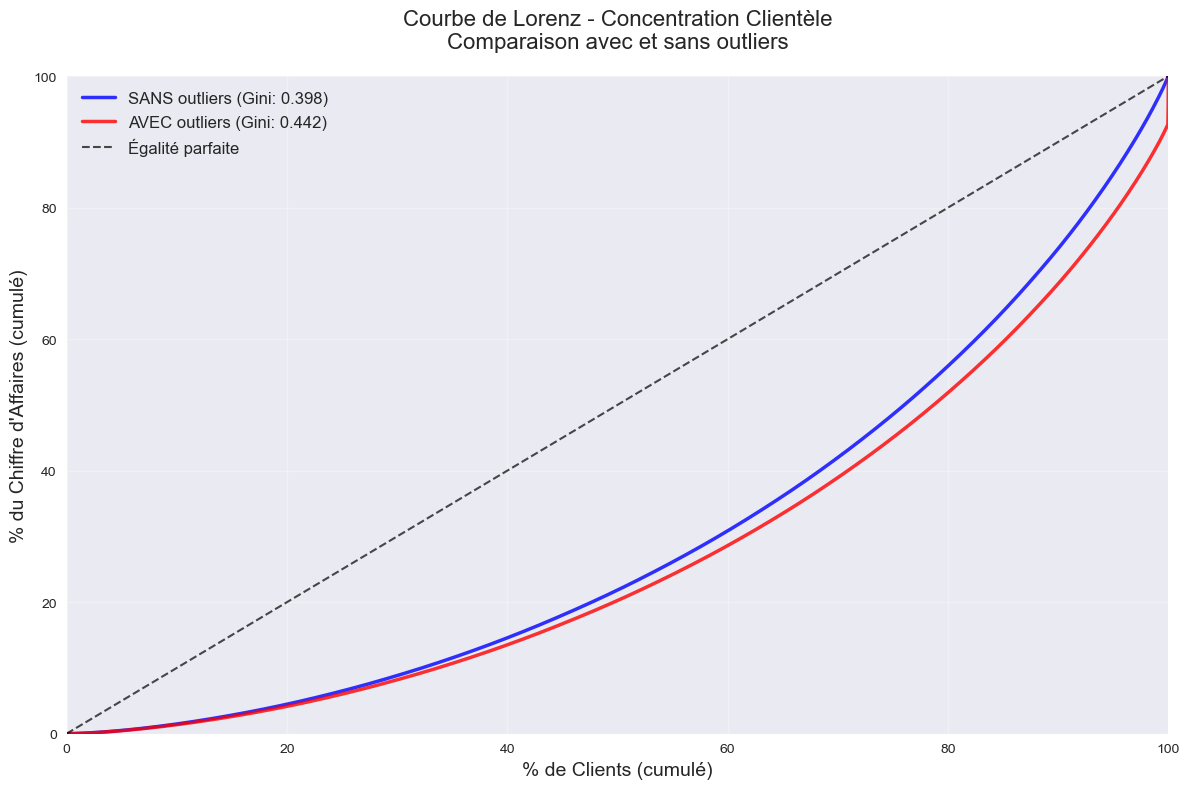

Coefficient de Gini SANS outliers: 0.3983
Coefficient de Gini AVEC outliers: 0.4419
Différence: 0.0436


In [88]:
plt.figure(figsize=(12, 8))

# Courbe SANS outliers
plt.plot(lorenz_x_sans_outliers, lorenz_y_sans_outliers, 
         label=f'SANS outliers (Gini: {gini_sans_outliers:.3f})', 
         linewidth=2.5, color='blue', alpha=0.8)

# Courbe AVEC outliers  
plt.plot(lorenz_x_avec_outliers, lorenz_y_avec_outliers, 
         label=f'AVEC outliers (Gini: {gini_avec_outliers:.3f})', 
         linewidth=2.5, color='red', alpha=0.8)

# Ligne d'égalité parfaite
plt.plot([0, 100], [0, 100], 'k--', linewidth=1.5, alpha=0.7, label='Égalité parfaite')

# Personnalisation
plt.xlabel('% de Clients (cumulé)', fontsize=14)
plt.ylabel('% du Chiffre d\'Affaires (cumulé)', fontsize=14)
plt.title('Courbe de Lorenz - Concentration Clientèle\nComparaison avec et sans outliers', fontsize=16, pad=20)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

# Affichage des résultats
print(f"Coefficient de Gini SANS outliers: {gini_sans_outliers:.4f}")
print(f"Coefficient de Gini AVEC outliers: {gini_avec_outliers:.4f}")
print(f"Différence: {abs(gini_avec_outliers - gini_sans_outliers):.4f}")

In [89]:
# Courbe de Lorenz

#fig = go.Figure()

#fig.add_trace(go.Scatter(x=lorenz_x, y=lorenz_y, mode='lines',
                        #name='Courbe de Lorenz', line=dict(color='blue', width=3)))

# Ligne d'égalité parfaite
#fig.add_trace(go.Scatter(x=[0, 100], y=[0, 100], mode='lines',
                        #name='Égalité parfaite', line=dict(color='red', dash='dash')))

#fig.update_layout(title=f'Courbe de Lorenz - Concentration Clientèle<br>Coefficient de Gini: {gini:.3f}',
                # xaxis_title='% de Clients (cumulé)',
                 #yaxis_title='% du CA (cumulé)',
                 #height=500)
#fig.show()

In [90]:
# Analyse des top clients
top_clients = client_ca.tail(20)  # Top 20 clients
top_clients_ca = top_clients.sum()
top_clients_pourcentage = top_clients_ca / total_ca_avec_outliers * 100

In [91]:
print("CONCENTRATION CLIENTÈLE :")
print(f"Coefficient de Gini : {gini_avec_outliers:.3f}")
print(f"Top 20 clients représentent : {top_clients_pourcentage:.1f}% du CA")
print(f"CA moyen par client : {client_ca.mean():.2f} €")
print(f"CA médian par client : {client_ca.median():.2f} €")

CONCENTRATION CLIENTÈLE :
Coefficient de Gini : 0.442
Top 20 clients représentent : 0.8% du CA
CA moyen par client : 1296.34 €
CA médian par client : 1045.59 €


In [92]:
# Client CA AVEC outliers (basé sur df_main complet)
client_ca_avec_outliers = df_main.groupby('client_id')['price'].sum()

# Total CA AVEC outliers
total_ca_avec_outliers = client_ca_avec_outliers.sum()

# CA des outliers
outliers_ca = client_ca_avec_outliers[top_4_clients].sum()
outliers_pourcentage = outliers_ca / total_ca_avec_outliers * 100

print(f"CA total (avec outliers) : {total_ca_avec_outliers:.2f}€")
print(f"CA des 4 outliers : {outliers_ca:.2f}€")
print(f"% du CA total : {outliers_pourcentage:.1f}%")

# Détail des outliers
print("\nDétail des 4 outliers :")
for client_id in top_4_clients:
    ca_client = client_ca_avec_outliers[client_id]
    print(f"Client {client_id}: {ca_client:.2f}€")

CA total (avec outliers) : 12027663.10€
CA des 4 outliers : 884296.09€
% du CA total : 7.4%

Détail des 4 outliers :
Client c_1609: 326039.89€
Client c_4958: 290227.03€
Client c_6714: 153918.60€
Client c_3454: 114110.57€


In [93]:
#10 moins bons clients

client_ca.head(10)



client_id
c_8351     6.31
c_8140     8.30
c_8114     9.98
c_4648    11.20
c_4478    13.36
c_6040    15.72
c_5919    15.98
c_5829    16.07
c_8032    17.64
c_4976    17.89
Name: price, dtype: float64

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse des comportements clients</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.0 - Comparaison des Montants par Genre</h3>
</div>

In [94]:


print("💰 ANALYSE DES MONTANTS PAR GENRE :")

# Test t de Student pour comparer CA homme vs femme
ca_hommes = df_main_sans_outliers[df_main['sex'] == 'm']['price']
ca_femmes = df_main_sans_outliers[df_main['sex'] == 'f']['price']

t_stat, p_ttest = ttest_ind(ca_hommes, ca_femmes)
print(f"Test t CA Homme vs Femme : t={t_stat:.4f}, p-value={p_ttest:.4f}")
print(f"Différence {'significative' if p_ttest < 0.05 else 'non significative'}")
print(f"CA moyen Hommes : {ca_hommes.mean():.2f}€")
print(f"CA moyen Femmes : {ca_femmes.mean():.2f}€")

# 💡 INTERPRÉTATION : Test t compare les montants moyens dépensés par genre
# p < 0.05 = hommes et femmes ont des comportements de dépense significativement différents
# Permet d'identifier si le genre influence le budget consacré aux achats

💰 ANALYSE DES MONTANTS PAR GENRE :
Test t CA Homme vs Femme : t=0.4247, p-value=0.6711
Différence non significative
CA moyen Hommes : 17.40€
CA moyen Femmes : 17.38€


C:\Users\jorda\AppData\Local\Temp\ipykernel_13116\292910975.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\jorda\AppData\Local\Temp\ipykernel_13116\292910975.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



C:\Users\jorda\AppData\Local\Temp\ipykernel_13116\171519199.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\jorda\AppData\Local\Temp\ipykernel_13116\171519199.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1200x600 with 0 Axes>

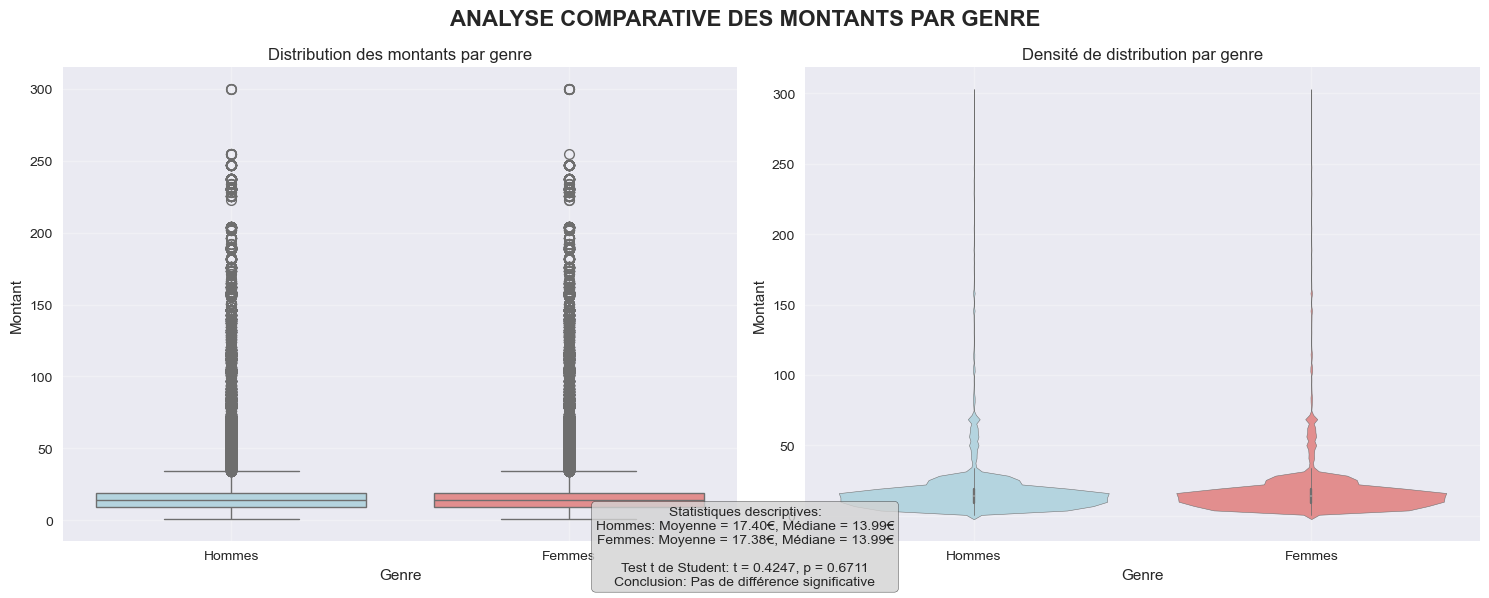

In [95]:
# Option avec Seaborn (plus moderne)
plt.figure(figsize=(12, 6))

# Préparer les données pour seaborn
import pandas as pd
df_plot = pd.DataFrame({
    'Montant': list(ca_hommes) + list(ca_femmes),
    'Genre': ['Hommes'] * len(ca_hommes) + ['Femmes'] * len(ca_femmes)
})

# Créer un subplot avec 2 graphiques côte à côte
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot avec seaborn
sns.boxplot(data=df_plot, x='Genre', y='Montant', ax=ax1, palette=['lightblue', 'lightcoral'])
ax1.set_title('Distribution des montants par genre')
ax1.grid(True, alpha=0.3)

# Violin plot avec seaborn
sns.violinplot(data=df_plot, x='Genre', y='Montant', ax=ax2, palette=['lightblue', 'lightcoral'])
ax2.set_title('Densité de distribution par genre')
ax2.grid(True, alpha=0.3)

plt.suptitle('ANALYSE COMPARATIVE DES MONTANTS PAR GENRE', fontsize=16, fontweight='bold')
plt.tight_layout()

# Ajouter les statistiques
stats_text = f"""Statistiques descriptives:
Hommes: Moyenne = {ca_hommes.mean():.2f}€, Médiane = {ca_hommes.median():.2f}€
Femmes: Moyenne = {ca_femmes.mean():.2f}€, Médiane = {ca_femmes.median():.2f}€

Test t de Student: t = {t_stat:.4f}, p = {p_ttest:.4f}
Conclusion: {'Différence significative' if p_ttest < 0.05 else 'Pas de différence significative'}"""

plt.figtext(0.5, 0.02, stats_text, ha='center', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.1 - Corrélation Genre et Catégories de livres</h3>
</div>

In [96]:
# Table de contingence
genre_cat = pd.crosstab(df_main_sans_outliers['sex'], df_main_sans_outliers['categ'], normalize='index') * 100

In [97]:
genre_cat 

categ,0,1,2
sex,,,
f,60.208879,34.699575,5.091546
m,60.697826,34.137482,5.164692


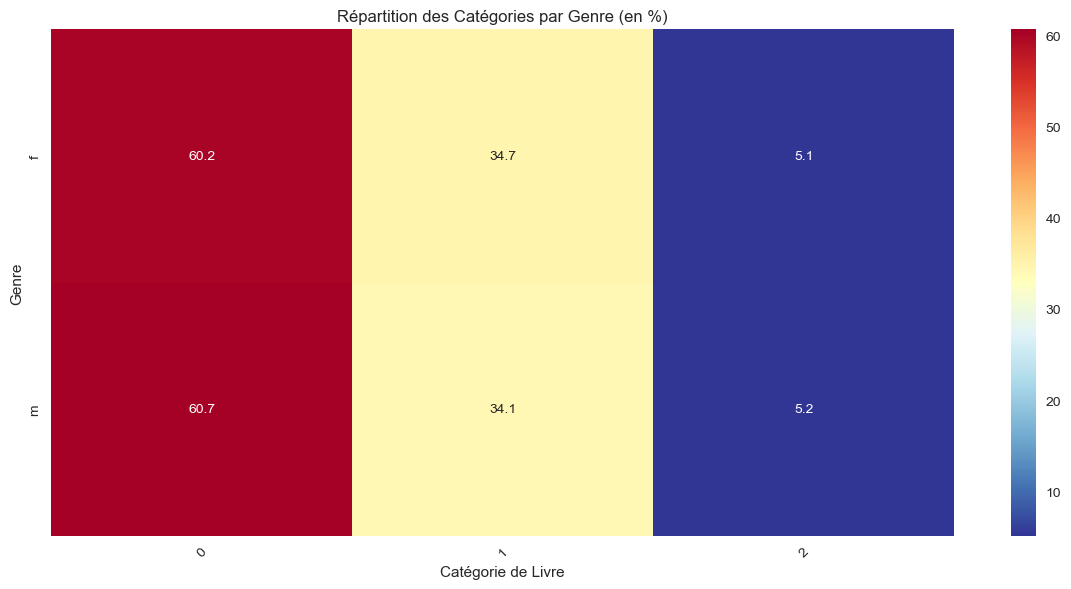

In [98]:
# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(genre_cat, annot=True, fmt='.1f', cmap='RdYlBu_r')
plt.title('Répartition des Catégories par Genre (en %)')
plt.xlabel('Catégorie de Livre')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [99]:
# Test du Chi2

chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(df_main['sex'], df_main['categ']))

print("ANALYSE GENRE vs CATÉGORIES :")
print(f"Test du Chi2 : {chi2:.2f} (p-value: {p_value:.4f})")
print(f"Corrélation {'significative' if p_value < 0.05 else 'non significative'}")

ANALYSE GENRE vs CATÉGORIES :
Test du Chi2 : 158.25 (p-value: 0.0000)
Corrélation significative


In [100]:
# Test de Cramér V pour mesurer la force d'association
def cramers_v(chi2_stat, n, r, c):
    """Calcule le V de Cramér pour mesurer la force d'association"""
    return np.sqrt(chi2_stat / (n * (min(r, c) - 1)))

contingency_genre = pd.crosstab(df_main['sex'], df_main['categ'])
n = contingency_genre.sum().sum()
r, c = contingency_genre.shape

cramers_genre = cramers_v(chi2, n, r, c)
print(f"V de Cramér Genre vs Catégorie : {cramers_genre:.3f}")
print(f"Association {'faible' if cramers_genre < 0.3 else 'modérée' if cramers_genre < 0.6 else 'forte'}")

# INTERPRÉTATION : Le V de Cramér mesure l'intensité de la relation entre genre et catégorie
# Plus proche de 1 = relation forte, plus proche de 0 = relation faible

V de Cramér Genre vs Catégorie : 0.015
Association faible


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.2 - Corrélation âge et montant des achats</h3>
</div>

In [101]:
# Montant total par client
client_age = df_main_sans_outliers.groupby('client_id').agg({
    'age': 'first',
    'tranche_age': 'first',
    'price': 'sum'
})

In [102]:
client_age

,age,tranche_age,price
client_id,,,
c_1,70,65+,629.02
c_10,69,65+,1353.60
c_100,33,26-35,254.85
c_1000,59,51-65,2291.88
c_1001,43,36-50,1823.85
...,...,...,...
c_995,70,65+,189.41
c_996,55,51-65,1637.34
c_997,31,26-35,1490.01


In [103]:
# 6.2 - Corrélation âge et montant des achats


# Tests de normalité AVANT les corrélations
print("🔍 TESTS DE NORMALITÉ :")

def test_normalite(data, nom_variable):
    sample_data = data.sample(5000) if len(data) > 5000 else data
    stat, p_value = shapiro(sample_data)
    print(f"{nom_variable} - Shapiro-Wilk: p-value={p_value:.4f}")
    print(f"Distribution {'normale' if p_value > 0.05 else 'non-normale'}")
    return p_value > 0.05


normalite_age = test_normalite(client_age['age'], "Âge")
normalite_price = test_normalite(client_age['price'], "Montant total")

# 💡 INTERPRÉTATION : Test de normalité vérifie si nos données suivent une courbe en cloche
# Si p > 0.05 = distribution normale  (tests paramétriques valides)
# Si p < 0.05 = distribution non-normale (préférer tests non-paramétriques)

# Corrélation 
correlation = client_age['age'].corr(client_age['price'])

# Corrélation de Spearman (alternative robuste)
rho_age_price, p_spear_price = spearmanr(client_age['age'], client_age['price'])
print(f"\nCorrélation Pearson Âge vs Montant : {correlation:.3f}")
print(f"Corrélation Spearman Âge vs Montant : ρ={rho_age_price:.3f}, p-value={p_spear_price:.4f}")

#  INTERPRÉTATION : Spearman ne suppose pas de distribution normale (plus robuste)
# Si Pearson ≈ Spearman = relation linéaire stable

🔍 TESTS DE NORMALITÉ :
Âge - Shapiro-Wilk: p-value=0.0000
Distribution non-normale
Montant total - Shapiro-Wilk: p-value=0.0000
Distribution non-normale

Corrélation Pearson Âge vs Montant : -0.188
Corrélation Spearman Âge vs Montant : ρ=-0.185, p-value=0.0000


C:\Users\jorda\AppData\Local\Temp\ipykernel_13116\3429864045.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




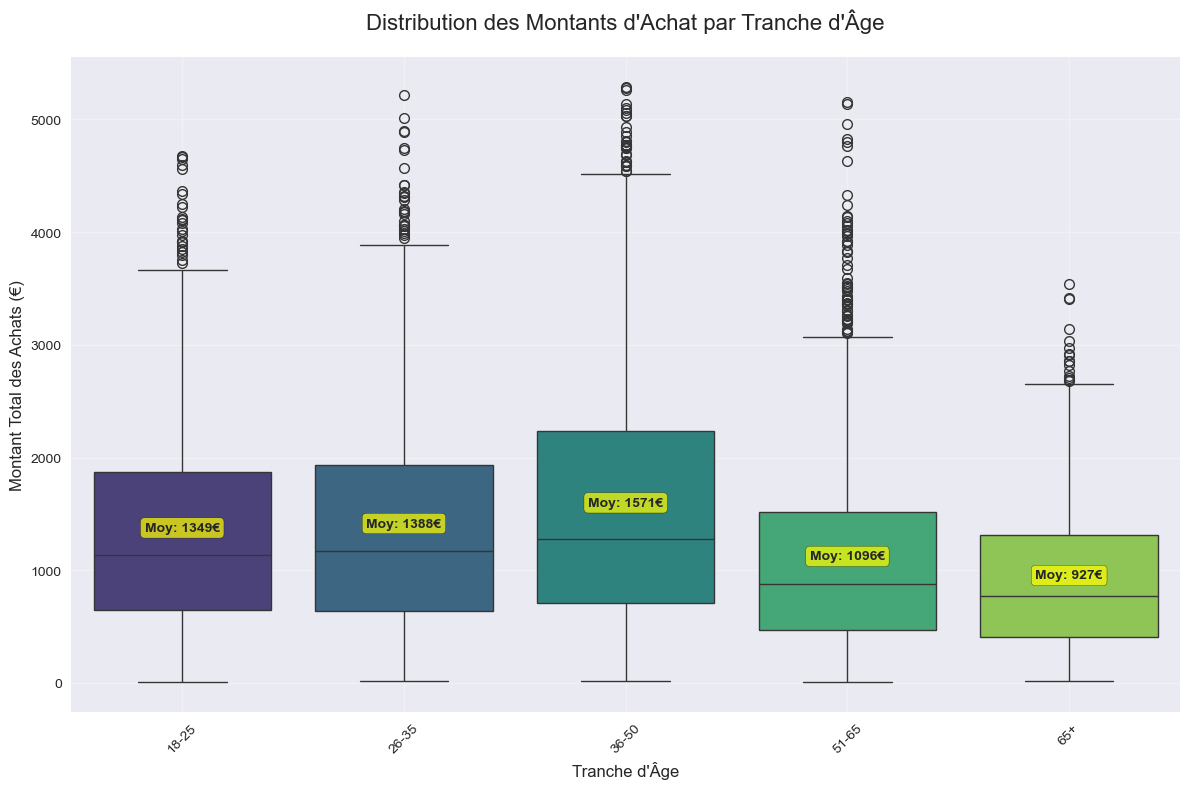

In [104]:
# Boxplot  par tranche d'âge 
plt.figure(figsize=(12, 8))

# Utilisation de seaborn pour un meilleur rendu
sns.boxplot(data=client_age, x='tranche_age', y='price', palette='viridis')
plt.title('Distribution des Montants d\'Achat par Tranche d\'Âge', fontsize=16, pad=20)
plt.xlabel('Tranche d\'Âge', fontsize=12)
plt.ylabel('Montant Total des Achats (€)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Ajouter les moyennes sur le graphique
for i, tranche in enumerate(client_age['tranche_age'].cat.categories):
    mean_val = client_age[client_age['tranche_age'] == tranche]['price'].mean()
    plt.text(i, mean_val, f'Moy: {mean_val:.0f}€', 
             horizontalalignment='center', fontweight='bold', 
             bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

In [105]:
# Analyse par tranches d'âge


age_group_analyse = client_age.groupby('tranche_age')['price'].agg(['mean', 'median', 'count'])

C:\Users\jorda\AppData\Local\Temp\ipykernel_13116\827878004.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [106]:
print("ÂGE vs MONTANT TOTAL :")
print(f"Corrélation : {correlation:.3f}")
print("\nAnalyse par tranche d'âge :")
print(age_group_analyse)

ÂGE vs MONTANT TOTAL :
Corrélation : -0.188

Analyse par tranche d'âge :
                    mean    median  count
tranche_age                              
18-25        1348.696883  1131.595    988
26-35        1387.648721  1173.260   1571
36-50        1571.310244  1275.580   2620
51-65        1096.484098   874.540   2045
65+           926.906363   772.710   1372


In [107]:
# ANOVA : Montant moyen par tranche d'âge
age_group_analyse = client_age.groupby('tranche_age')['price'].agg(['mean', 'median', 'count'])

tranches_montant = [group['price'].values for name, group in client_age.groupby('tranche_age')]
f_stat_age, p_anova_age = f_oneway(*tranches_montant)
print(f"ANOVA Montant par tranche d'âge : F={f_stat_age:.4f}, p-value={p_anova_age:.4f}")

# Test de Kruskal-Wallis (alternative non-paramétrique)
h_stat_age, p_kruskal_age = kruskal(*tranches_montant)
print(f"Kruskal-Wallis Montant par âge : H={h_stat_age:.4f}, p-value={p_kruskal_age:.4f}")

# 💡 INTERPRÉTATION : 
# - ANOVA teste si TOUTES les tranches d'âge dépensent différemment
# - Kruskal-Wallis = version robuste qui ne suppose pas de normalité
# - p < 0.05 = au moins une tranche diffère significativement → segmentation justifiée

#Tests post-hoc si significatif
if p_anova_age < 0.05:
    from scipy.stats import tukey_hsd
    print("\n🔬 TESTS POST-HOC (Tukey HSD) :")
    tukey_result = tukey_hsd(*tranches_montant)
    print(tukey_result)
    print("💡 Identifie précisément quelles tranches d'âge dépensent différemment")

C:\Users\jorda\AppData\Local\Temp\ipykernel_13116\511839902.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\jorda\AppData\Local\Temp\ipykernel_13116\511839902.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



ANOVA Montant par tranche d'âge : F=139.9093, p-value=0.0000
Kruskal-Wallis Montant par âge : H=481.1481, p-value=0.0000

🔬 TESTS POST-HOC (Tukey HSD) :
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    -38.952     0.840  -141.852    63.948
 (0 - 2)   -222.613     0.000  -317.226  -128.000
 (0 - 3)    252.213     0.000   154.025   350.401
 (0 - 4)    421.791     0.000   316.049   527.532
 (1 - 0)     38.952     0.840   -63.948   141.852
 (1 - 2)   -183.662     0.000  -264.528  -102.795
 (1 - 3)    291.165     0.000   206.144   376.186
 (1 - 4)    460.742     0.000   367.099   554.386
 (2 - 0)    222.613     0.000   128.000   317.226
 (2 - 1)    183.662     0.000   102.795   264.528
 (2 - 3)    474.826     0.000   400.048   549.604
 (2 - 4)    644.404     0.000   559.951   728.857
 (3 - 0)   -252.213     0.000  -350.401  -154.025
 (3 - 1)   -291.165     0.000  -376.186  -206.144
 (3 - 2)   -474.826     0.000

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.3 - Corrélation âge et frequence d'achat</h3>
</div>

In [108]:
# Fréquence d'achat par client
client_frequence = df_main.groupby('client_id').agg({
    'age': 'first',
    'session_id': 'nunique'  # Nombre de sessions d'achat
}).rename(columns={'session_id': 'nb_achats'})

In [109]:
# Test de normalité sur la fréquence 
normalite_freq = test_normalite(client_frequence['nb_achats'], "Fréquence d'achat")

Fréquence d'achat - Shapiro-Wilk: p-value=0.0000
Distribution non-normale


In [110]:
# Corrélations 
correlation_freq = client_frequence['age'].corr(client_frequence['nb_achats'])
rho_age_freq, p_spear_freq = spearmanr(client_frequence['age'], client_frequence['nb_achats'])

print(f"Corrélation Pearson Âge vs Fréquence : {correlation_freq:.3f}")
print(f"Corrélation Spearman Âge vs Fréquence : ρ={rho_age_freq:.3f}, p-value={p_spear_freq:.4f}")

# 💡 INTERPRÉTATION : Compare Pearson vs Spearman pour valider la robustesse
# Corrélation faible = l'âge influence peu la fréquence d'achat

Corrélation Pearson Âge vs Fréquence : 0.034
Corrélation Spearman Âge vs Fréquence : ρ=0.212, p-value=0.0000


In [111]:
# Analyse par tranches d'âge
client_frequence['tranche_age'] = pd.cut(client_age['age'], 
                                        bins = [0, 26, 36, 51, 66, 100],
                                        labels = ['18-25', '26-35', '36-50', '51-65', '65+'])

frequence_analyse = client_frequence.groupby('tranche_age')['nb_achats'].agg(['mean', 'median', 'count'])

C:\Users\jorda\AppData\Local\Temp\ipykernel_13116\2131549339.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [112]:
frequence_analyse

,mean,median,count
tranche_age,,,
18-25,19.100349,17.0,1146
26-35,27.398463,20.0,1561
36-50,49.327508,39.0,2632
51-65,40.595766,31.0,1984
65+,37.263158,27.0,1273


C:\Users\jorda\AppData\Local\Temp\ipykernel_13116\1249419171.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




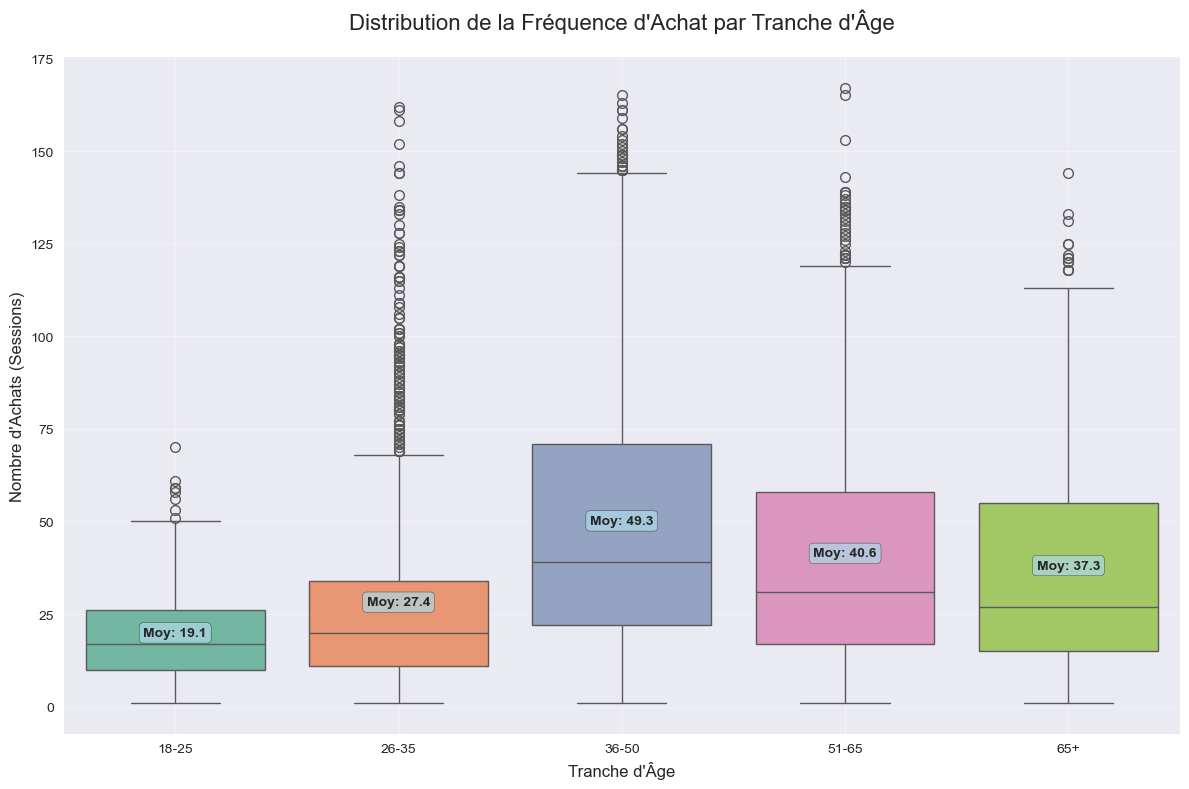

In [113]:
# Boxplot âge vs fréquence d'achat


plt.figure(figsize=(12, 8))
sns.boxplot(data=client_frequence, x='tranche_age', y='nb_achats', palette='Set2')
plt.title('Distribution de la Fréquence d\'Achat par Tranche d\'Âge', fontsize=16, pad=20)
plt.xlabel('Tranche d\'Âge', fontsize=12)
plt.ylabel('Nombre d\'Achats (Sessions)', fontsize=12)

# Ajouter les moyennes sur le boxplot
for i, tranche in enumerate(client_frequence['tranche_age'].cat.categories):
    if pd.notna(tranche):  # Éviter les valeurs NaN
        mean_val = client_frequence[client_frequence['tranche_age'] == tranche]['nb_achats'].mean()
        plt.text(i, mean_val, f'Moy: {mean_val:.1f}', 
                 horizontalalignment='center', fontweight='bold', 
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [114]:
# Définir l'ordre des tranches d'âge
ordre_tranches = ['18-25', '26-35', '36-50', '51-65', '65+']

# Boxplot avec ordre spécifié
fig_box = px.box(client_frequence, x='tranche_age', y='nb_achats',
                 title='Distribution de la Fréquence d\'Achat par Tranche d\'Âge',
                 color='tranche_age',
                 category_orders={'tranche_age': ordre_tranches})

fig_box.update_layout(xaxis_title='Tranche d\'Âge', 
                      yaxis_title='Nombre d\'Achats (Sessions)', 
                      height=500,
                      showlegend=False)
fig_box.show()

In [115]:
frequence_analyse

,mean,median,count
tranche_age,,,
18-25,19.100349,17.0,1146
26-35,27.398463,20.0,1561
36-50,49.327508,39.0,2632
51-65,40.595766,31.0,1984
65+,37.263158,27.0,1273


In [116]:
print("ÂGE vs FRÉQUENCE D'ACHAT :")
print(f"Corrélation : {correlation_freq:.3f}")
print("\nFréquence par tranche d'âge :")
print(frequence_analyse)

ÂGE vs FRÉQUENCE D'ACHAT :
Corrélation : 0.034

Fréquence par tranche d'âge :
                  mean  median  count
tranche_age                          
18-25        19.100349    17.0   1146
26-35        27.398463    20.0   1561
36-50        49.327508    39.0   2632
51-65        40.595766    31.0   1984
65+          37.263158    27.0   1273


In [117]:
# ANOVA : Fréquence moyenne par tranche d'âge
client_frequence['tranche_age'] = pd.cut(client_frequence['age'], bins=[21, 30, 40, 50, 60, 80])
tranches_freq = [group['nb_achats'].values for name, group in client_frequence.groupby('tranche_age')]

f_stat_freq, p_anova_freq = f_oneway(*tranches_freq)
print(f"ANOVA Fréquence par tranche d'âge : F={f_stat_freq:.4f}, p-value={p_anova_freq:.4f}")

# AJOUTER : Kruskal-Wallis
h_stat_freq, p_kruskal_freq = kruskal(*tranches_freq)
print(f"Kruskal-Wallis Fréquence par âge : H={h_stat_freq:.4f}, p-value={p_kruskal_freq:.4f}")

# AJOUTER : Tests post-hoc si significatif
if p_anova_freq < 0.05:
    print("\n🔬 TESTS POST-HOC (Tukey HSD) :")
    tukey_result = tukey_hsd(*tranches_freq)
    print(tukey_result)
    print("💡 Identifie les tranches d'âge avec des fréquences d'achat différentes")
else:
    print("💡 Pas de différences significatives → Tukey non nécessaire")

# INTERPRÉTATION : Teste si certaines tranches d'âge achètent plus fréquemment
# Guide l'identification des segments de clients les plus actifs

ANOVA Fréquence par tranche d'âge : F=10.3006, p-value=0.0000
Kruskal-Wallis Fréquence par âge : H=872.7721, p-value=0.0000

🔬 TESTS POST-HOC (Tukey HSD) :


C:\Users\jorda\AppData\Local\Temp\ipykernel_13116\3409443415.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    -18.558     0.007   -33.676    -3.439
 (0 - 2)    -33.655     0.000   -48.476   -18.834
 (0 - 3)    -25.317     0.000   -40.668    -9.967
 (0 - 4)    -16.930     0.019   -32.005    -1.855
 (1 - 0)     18.558     0.007     3.439    33.676
 (1 - 2)    -15.097     0.029   -29.206    -0.989
 (1 - 3)     -6.760     0.717   -21.424     7.904
 (1 - 4)      1.628     0.998   -12.747    16.002
 (2 - 0)     33.655     0.000    18.834    48.476
 (2 - 1)     15.097     0.029     0.989    29.206
 (2 - 3)      8.338     0.507    -6.019    22.694
 (2 - 4)     16.725     0.010     2.664    30.786
 (3 - 0)     25.317     0.000     9.967    40.668
 (3 - 1)      6.760     0.717    -7.904    21.424
 (3 - 2)     -8.338     0.507   -22.694     6.019
 (3 - 4)      8.387     0.520    -6.231    23.006
 (4 - 0)     16.930     0.019     1.855    32.005
 (4 - 1)     -1.628     0.998   

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.4 - Corrélation âge et Taille du panier moyen</h3>
</div>

In [118]:
# Panier moyen par client
client_panier = df_main.groupby('client_id').agg({
    'age': 'first',
    'price': 'mean'  # Montant moyen par session
}).rename(columns={'price': 'panier_moyen'})

# Test de normalité sur le panier moyen
normalite_panier = test_normalite(client_panier['panier_moyen'], "Panier moyen")

Panier moyen - Shapiro-Wilk: p-value=0.0000
Distribution non-normale


In [119]:
# Corrélation
correlation_panier = client_panier['age'].corr(client_panier['panier_moyen'])
rho_age_panier, p_spear_panier = spearmanr(client_panier['age'], client_panier['panier_moyen'])

print(f"Corrélation Pearson Âge vs Panier : {correlation_panier:.3f}")
print(f"Corrélation Spearman Âge vs Panier : ρ={rho_age_panier:.3f}, p-value={p_spear_panier:.4f}")

# INTERPRÉTATION : Corrélation plutot forte (-0.511 et -0.326) = relation robuste
# Les jeunes semblent avoir des paniers plus élevés

Corrélation Pearson Âge vs Panier : -0.511
Corrélation Spearman Âge vs Panier : ρ=-0.326, p-value=0.0000


In [120]:
# Analyse par tranches d'âge
client_panier['tranche_age'] = pd.cut(client_age['age'], 
                                        bins = [0, 26, 36, 51, 66, 100],
                                        labels = ['18-25', '26-35', '36-50', '51-65', '65+'])

panier_analyse = client_panier.groupby('tranche_age')['panier_moyen'].agg(['mean', 'median', 'count'])

C:\Users\jorda\AppData\Local\Temp\ipykernel_13116\198240122.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\jorda\AppData\Local\Temp\ipykernel_13116\2035664339.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




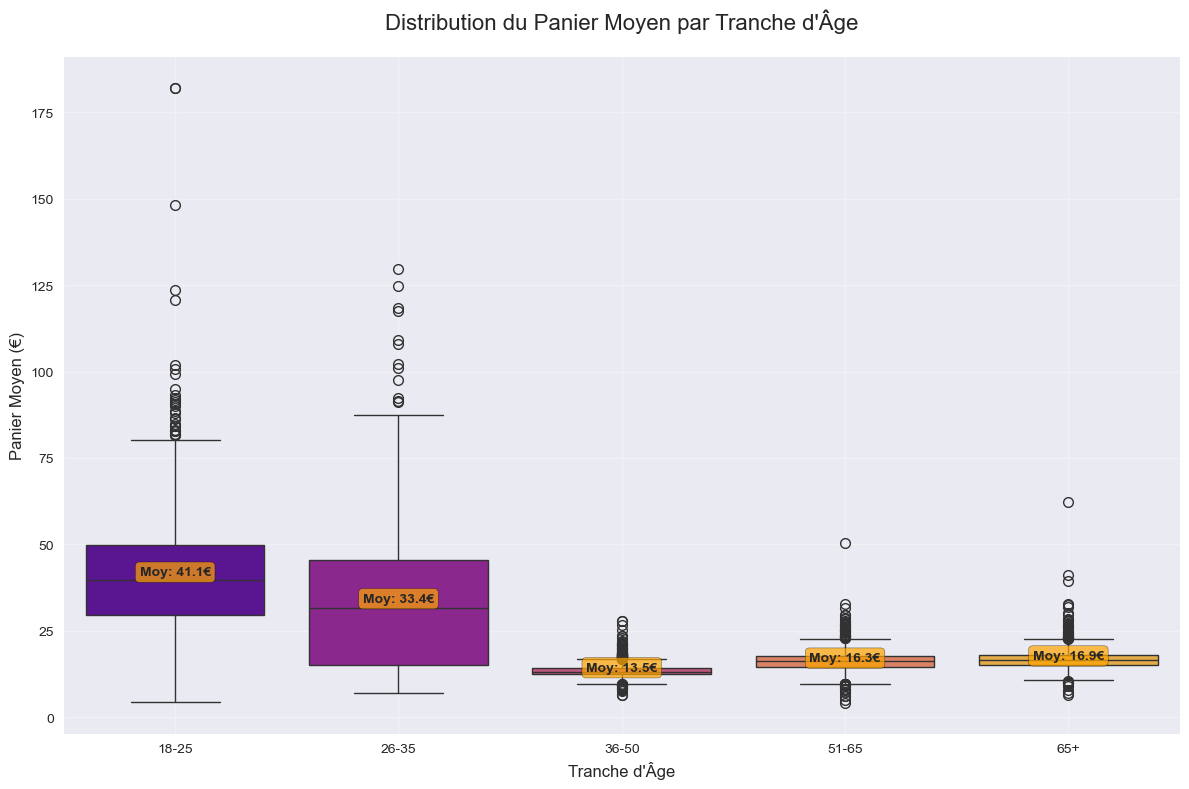

In [121]:
# Boxplot âge vs panier moyen

plt.figure(figsize=(12, 8))
sns.boxplot(data=client_panier, x='tranche_age', y='panier_moyen', palette='plasma')
plt.title('Distribution du Panier Moyen par Tranche d\'Âge', fontsize=16, pad=20)
plt.xlabel('Tranche d\'Âge', fontsize=12)
plt.ylabel('Panier Moyen (€)', fontsize=12)

# Ajouter les moyennes sur le boxplot
for i, tranche in enumerate(client_panier['tranche_age'].cat.categories):
    if pd.notna(tranche):  # Éviter les valeurs NaN
        mean_val = client_panier[client_panier['tranche_age'] == tranche]['panier_moyen'].mean()
        plt.text(i, mean_val, f'Moy: {mean_val:.1f}€', 
                 horizontalalignment='center', fontweight='bold', 
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='orange', alpha=0.7))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [122]:
print("ÂGE vs PANIER MOYEN :")
print(f"Corrélation : {correlation_panier:.3f}")
print("\nPanier moyen par tranche d'âge :")
print(panier_analyse)

ÂGE vs PANIER MOYEN :
Corrélation : -0.511

Panier moyen par tranche d'âge :
                  mean     median  count
tranche_age                             
18-25        41.108849  39.656659   1146
26-35        33.433578  31.615667   1561
36-50        13.463013  13.233479   2632
51-65        16.259154  16.174192   1984
65+          16.876857  16.571429   1273


In [123]:
# ANOVA : Panier moyen par tranche d'âge
tranches_panier = [group['panier_moyen'].values for name, group in client_panier.groupby('tranche_age')]

f_stat_panier, p_anova_panier = f_oneway(*tranches_panier)
print(f"ANOVA Panier par tranche d'âge : F={f_stat_panier:.4f}, p-value={p_anova_panier:.4f}")

# Test post-hoc de Tukey si ANOVA significative
if p_anova_panier < 0.05:
    from scipy.stats import tukey_hsd
    print("\nTests post-hoc (Tukey HSD) :")
    tukey_result = tukey_hsd(*tranches_panier)
    print(tukey_result)

#  INTERPRÉTATION : 
# - ANOVA confirme que les tranches d'âge ont des comportements différents
# - Tukey identifie PRÉCISÉMENT quelles tranches diffèrent
# - Justifie une stratégie marketing segmentée par âge
#Kruskal-Wallis
h_stat_panier, p_kruskal_panier = kruskal(*tranches_panier)
print(f"Kruskal-Wallis Panier par âge : H={h_stat_panier:.4f}, p-value={p_kruskal_panier:.4f}")
print(" Confirme les résultats ANOVA avec une approche non-paramétrique")

ANOVA Panier par tranche d'âge : F=2114.0496, p-value=0.0000

Tests post-hoc (Tukey HSD) :


C:\Users\jorda\AppData\Local\Temp\ipykernel_13116\1760495923.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      7.675     0.000     6.572     8.778
 (0 - 2)     27.646     0.000    26.642    28.649
 (0 - 3)     24.850     0.000    23.798    25.902
 (0 - 4)     24.232     0.000    23.078    25.386
 (1 - 0)     -7.675     0.000    -8.778    -6.572
 (1 - 2)     19.971     0.000    19.065    20.876
 (1 - 3)     17.174     0.000    16.215    18.134
 (1 - 4)     16.557     0.000    15.486    17.627
 (2 - 0)    -27.646     0.000   -28.649   -26.642
 (2 - 1)    -19.971     0.000   -20.876   -19.065
 (2 - 3)     -2.796     0.000    -3.639    -1.953
 (2 - 4)     -3.414     0.000    -4.382    -2.446
 (3 - 0)    -24.850     0.000   -25.902   -23.798
 (3 - 1)    -17.174     0.000   -18.134   -16.215
 (3 - 2)      2.796     0.000     1.953     3.639
 (3 - 4)     -0.618     0.462    -1.636     0.400
 (4 - 0)    -24.232     0.000   -25.386   -23.078
 (4 - 1)    -16.557     0.000   

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.5 - Corrélation âge et catégorie de Livres</h3>
</div>

In [124]:
# Répartition des catégories par tranche d'âge
df_second = df_main.copy()
df_second['tranche_age'] = pd.cut(df_second['age'], 
                                        bins = [0, 26, 36, 51, 66, 100],
                                        labels = ['18-25', '26-35', '36-50', '51-65', '65+'])


In [125]:
age_categorie = pd.crosstab(df_second['tranche_age'], df_second['categ'], normalize='index') * 100

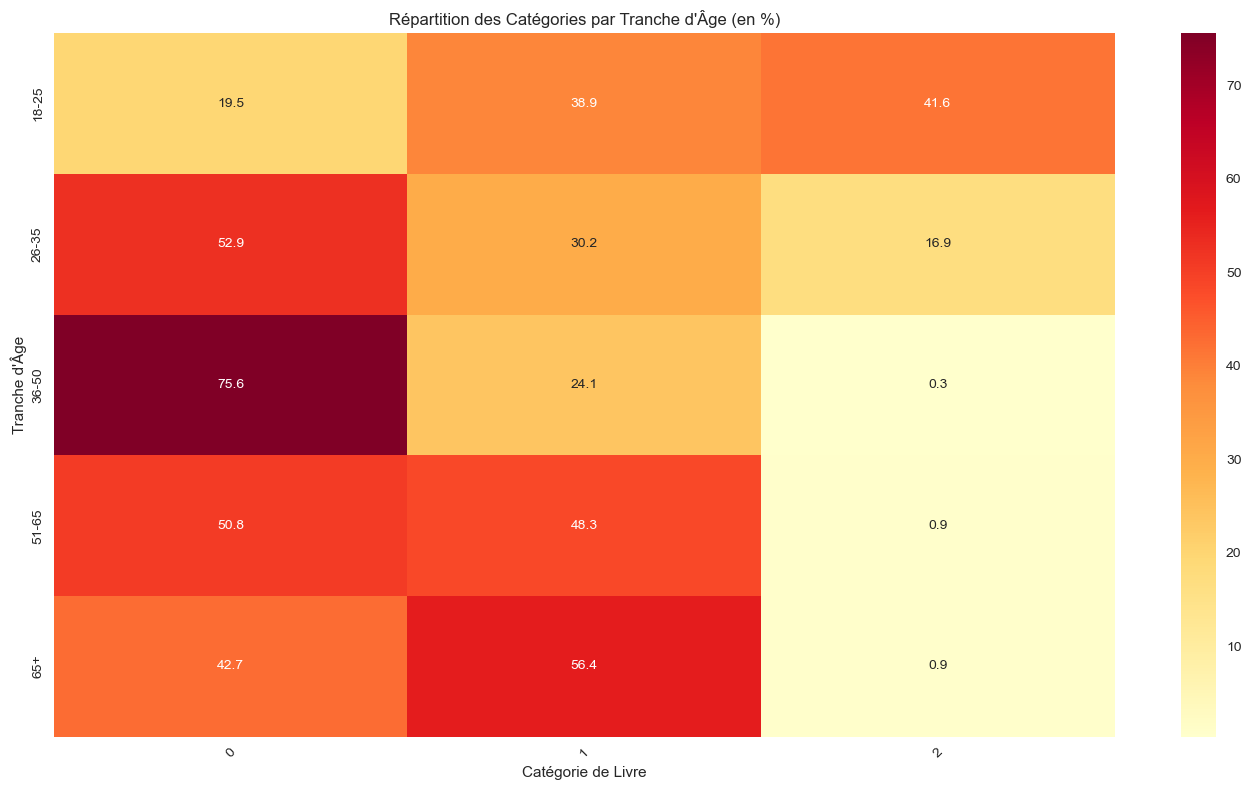

In [126]:
# Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(age_categorie, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Répartition des Catégories par Tranche d\'Âge (en %)')
plt.xlabel('Catégorie de Livre')
plt.ylabel('Tranche d\'Âge')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [127]:
# Test statistique
chi2_age, p_value_age, dof, expected = chi2_contingency(pd.crosstab(df_second['tranche_age'], df_second['categ']))


In [128]:
print("ÂGE vs CATÉGORIES :")
print(f"Test du Chi2 : {chi2_age:.2f} (p-value: {p_value_age:.4f})")
print(f"Corrélation {'significative' if p_value_age < 0.05 else 'non significative'}")

# Préférences par tranche d'âge
for age_group in age_categorie.index:
    all_cat = age_categorie.loc[age_group].sort_values(ascending=False)
    print(f"\n{age_group} ans - Répartition :")
    for cat, pct in all_cat.items():
        print(f"  {cat}: {pct:.1f}%")

ÂGE vs CATÉGORIES :
Test du Chi2 : 216527.54 (p-value: 0.0000)
Corrélation significative

18-25 ans - Répartition :
  2: 41.6%
  1: 38.9%
  0: 19.5%

26-35 ans - Répartition :
  0: 52.9%
  1: 30.2%
  2: 16.9%

36-50 ans - Répartition :
  0: 75.6%
  1: 24.1%
  2: 0.3%

51-65 ans - Répartition :
  0: 50.8%
  1: 48.3%
  2: 0.9%

65+ ans - Répartition :
  1: 56.4%
  0: 42.7%
  2: 0.9%
